In [48]:
# Dependencies
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from config import consumer_key, consumer_secret, access_token, access_token_secret

In [49]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [50]:
 # Twitter API Keys
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

In [51]:
 # Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [52]:
 # Target Search Term
target_users = ("@CNN", "@CBS", "@BBCWorld","@FoxNews","@nytimes")


In [53]:
tweet_analysis = []
tweet_text = []
tweet_date = []
tweet_name = []
tweets_ago = []
oldest_tweet = None


In [54]:
 # Loop through all tweets
for target_user in target_users:
    counter = 1
    for x in range(1, 6):
        public_tweets = api.user_timeline(target_user, page=x)
        for tweet in public_tweets:
            oldest_tweet = tweet['id'] - 1
            tweets_ago.append(counter)
            tweet_analysis.append(analyzer.polarity_scores(tweet["text"]))
            tweet_text.append(tweet["text"])
            tweet_date.append(tweet["created_at"])
            tweet_name.append(target_user)
            counter += 1
    

In [55]:
sentiment_df = pd.DataFrame(data=tweet_analysis)
sentiment_df["text"] = tweet_text
sentiment_df["date"] = tweet_date
sentiment_df["User"] = tweet_name
sentiment_df["tweets ago"] = tweets_ago

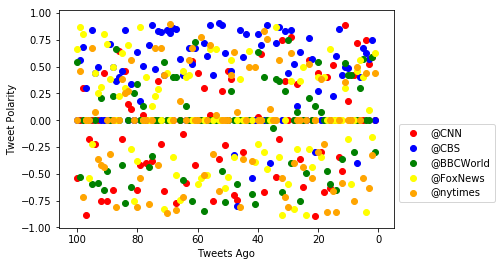

In [58]:
i = 0
colors = ('red','blue','green','yellow','orange')
for user in target_users:
    chart_df = sentiment_df.loc[sentiment_df["User"] == user]
    plt.scatter(chart_df["tweets ago"], chart_df["compound"],c=colors[i])
    i += 1
sentiment_df.to_csv("TwitterSentiment.csv", encoding="utf-8")
plt.gca().invert_xaxis()
plt.ylabel('Tweet Polarity')
plt.xlabel('Tweets Ago')
plt.legend(sentiment_df.User.unique(),bbox_to_anchor=(1, 0.5))
plt.savefig("ScatterPlot.png")
plt.show()

In [59]:
y_pos = np.arange(len(target_users))
polarity = sentiment_df.groupby("User").mean()

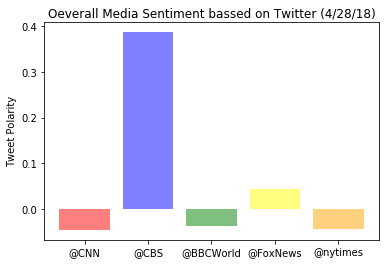

In [60]:
plt.bar(y_pos, polarity["compound"], align='center', alpha=0.5, color=colors)
plt.xticks(y_pos, target_users)
plt.ylabel('Tweet Polarity')
plt.title('Oeverall Media Sentiment bassed on Twitter (4/28/18)')
plt.savefig("BarChart.png")
plt.show()